In [1]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('weather_classification_data.csv')

In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns =['Precipitation (%)','UV Index','Visibility (km)'], inplace = True)

In [8]:
df.head()

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Location,Weather Type
0,14.0,73,9.5,partly cloudy,1010.82,Winter,inland,Rainy
1,39.0,96,8.5,partly cloudy,1011.43,Spring,inland,Cloudy
2,30.0,64,7.0,clear,1018.72,Spring,mountain,Sunny
3,38.0,83,1.5,clear,1026.25,Spring,coastal,Sunny
4,27.0,74,17.0,overcast,990.67,Winter,mountain,Rainy


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Cloud Cover'>

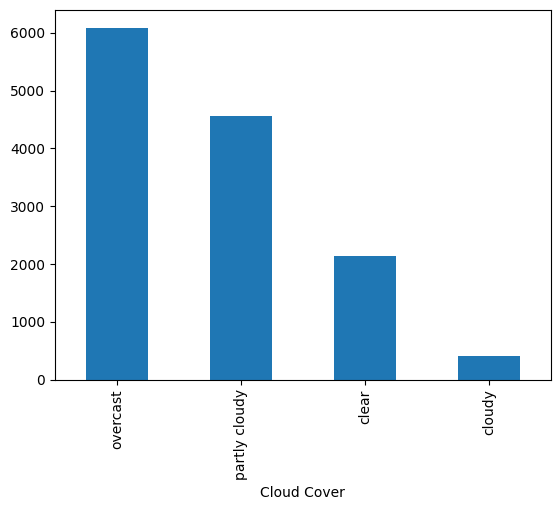

In [10]:
df['Cloud Cover'].value_counts().plot(kind ='bar')

<Axes: xlabel='Season'>

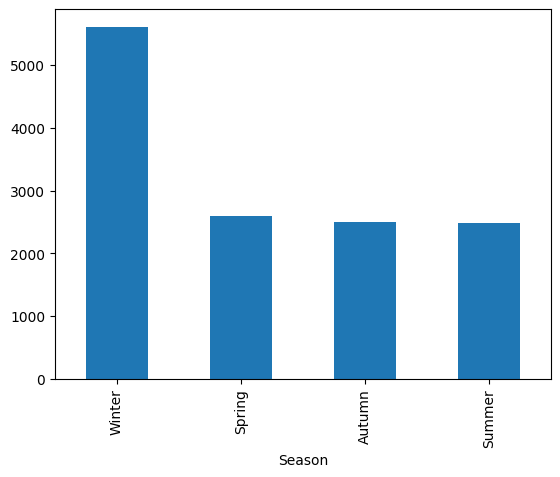

In [11]:
df['Season'].value_counts().plot(kind ='bar')

<Axes: xlabel='Location'>

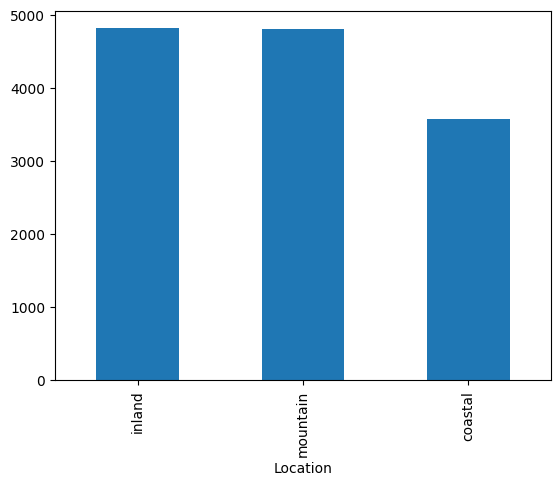

In [12]:
df['Location'].value_counts().plot(kind ='bar')

<Axes: xlabel='Weather Type'>

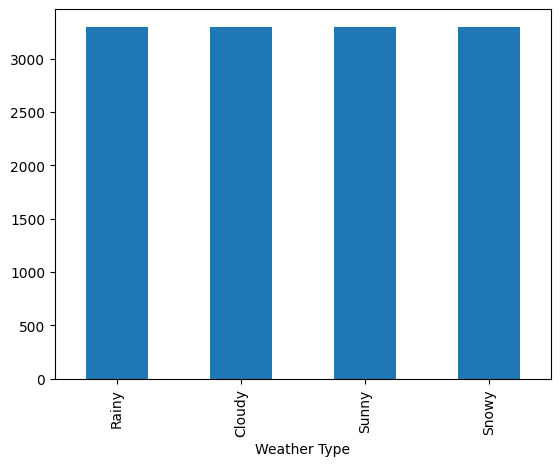

In [13]:
df['Weather Type'].value_counts().plot(kind = 'bar')

## Outlier Detection
### We use box plot for detection of outlier and removal of outliers we use IQR Method

<Axes: >

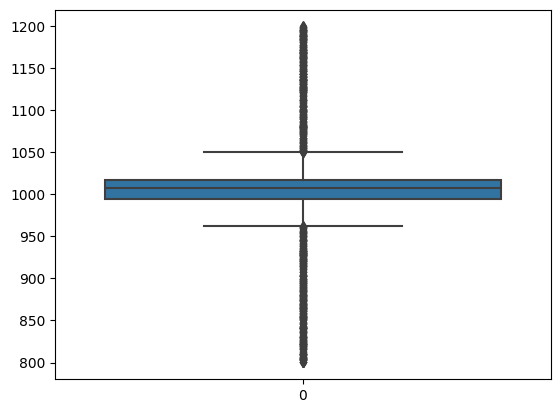

In [14]:
sns.boxplot(df['Atmospheric Pressure'])

In [15]:
# Calculate the 25th and 75th percentiles
percentile25 = df['Atmospheric Pressure'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['Atmospheric Pressure'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['Atmospheric Pressure'] = np.where(
    new_df['Atmospheric Pressure'] > uplimit, uplimit,
    np.where(new_df['Atmospheric Pressure'] < lolimit, lolimit, new_df['Atmospheric Pressure'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())

25th Percentile: 994.8
75th Percentile: 1016.7725
Upper Limit: 1049.7312500000003 Lower Limit: 961.8412499999998
   Temperature  Humidity  Wind Speed    Cloud Cover  Atmospheric Pressure  \
0         14.0        73         9.5  partly cloudy               1010.82   
1         39.0        96         8.5  partly cloudy               1011.43   
2         30.0        64         7.0          clear               1018.72   
3         38.0        83         1.5          clear               1026.25   
4         27.0        74        17.0       overcast                990.67   

   Season  Location Weather Type  
0  Winter    inland        Rainy  
1  Spring    inland       Cloudy  
2  Spring  mountain        Sunny  
3  Spring   coastal        Sunny  
4  Winter  mountain        Rainy  


<Axes: >

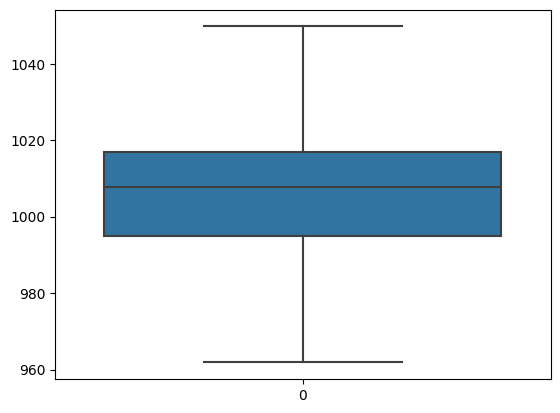

In [16]:
sns.boxplot(new_df['Atmospheric Pressure'])

In [17]:
df = new_df.copy()

<Axes: >

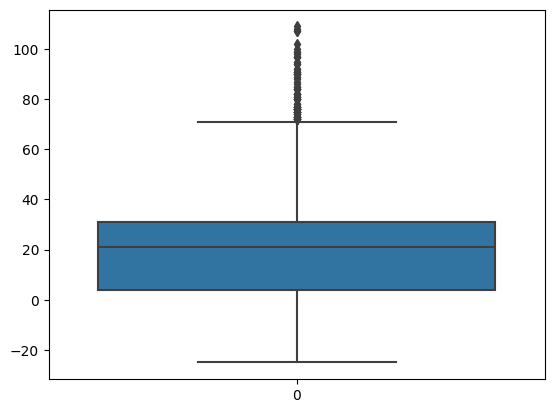

In [18]:
sns.boxplot(df['Temperature'])

In [19]:
# Calculate the 25th and 75th percentiles
percentile25 = df['Temperature'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['Temperature'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['Temperature'] = np.where(
    new_df['Temperature'] > uplimit, uplimit,
    np.where(new_df['Temperature'] < lolimit, lolimit, new_df['Temperature'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())

25th Percentile: 4.0
75th Percentile: 31.0
Upper Limit: 71.5 Lower Limit: -36.5
   Temperature  Humidity  Wind Speed    Cloud Cover  Atmospheric Pressure  \
0         14.0        73         9.5  partly cloudy               1010.82   
1         39.0        96         8.5  partly cloudy               1011.43   
2         30.0        64         7.0          clear               1018.72   
3         38.0        83         1.5          clear               1026.25   
4         27.0        74        17.0       overcast                990.67   

   Season  Location Weather Type  
0  Winter    inland        Rainy  
1  Spring    inland       Cloudy  
2  Spring  mountain        Sunny  
3  Spring   coastal        Sunny  
4  Winter  mountain        Rainy  


In [20]:
df = new_df.copy()

<Axes: >

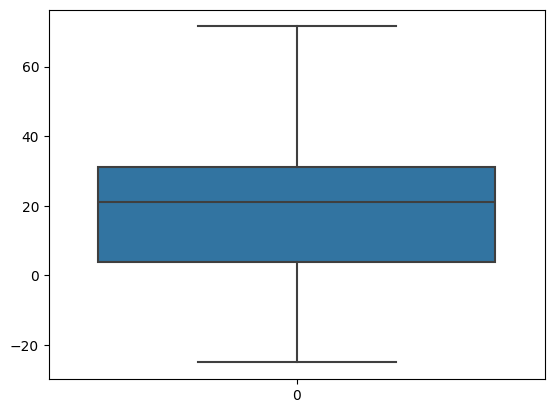

In [21]:
sns.boxplot(df['Temperature'])

<Axes: >

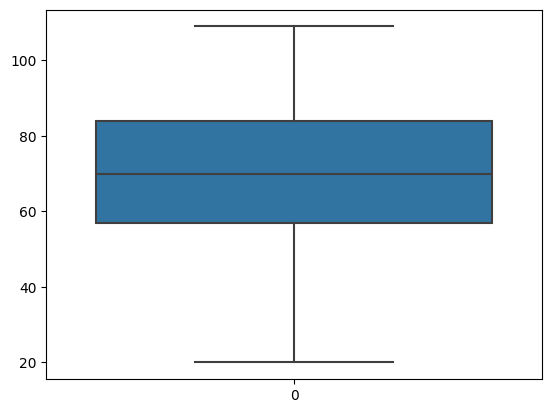

In [22]:
sns.boxplot(df['Humidity'])

<Axes: >

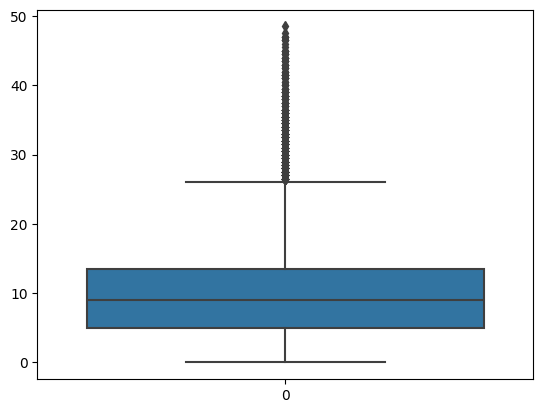

In [23]:
sns.boxplot(df['Wind Speed'])

In [24]:
# Calculate the 25th and 75th percentiles
percentile25 = df['Wind Speed'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['Wind Speed'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['Wind Speed'] = np.where(
    new_df['Wind Speed'] > uplimit, uplimit,
    np.where(new_df['Wind Speed'] < lolimit, lolimit, new_df['Wind Speed'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())

25th Percentile: 5.0
75th Percentile: 13.5
Upper Limit: 26.25 Lower Limit: -7.75
   Temperature  Humidity  Wind Speed    Cloud Cover  Atmospheric Pressure  \
0         14.0        73         9.5  partly cloudy               1010.82   
1         39.0        96         8.5  partly cloudy               1011.43   
2         30.0        64         7.0          clear               1018.72   
3         38.0        83         1.5          clear               1026.25   
4         27.0        74        17.0       overcast                990.67   

   Season  Location Weather Type  
0  Winter    inland        Rainy  
1  Spring    inland       Cloudy  
2  Spring  mountain        Sunny  
3  Spring   coastal        Sunny  
4  Winter  mountain        Rainy  


In [25]:
df = new_df.copy()

<Axes: >

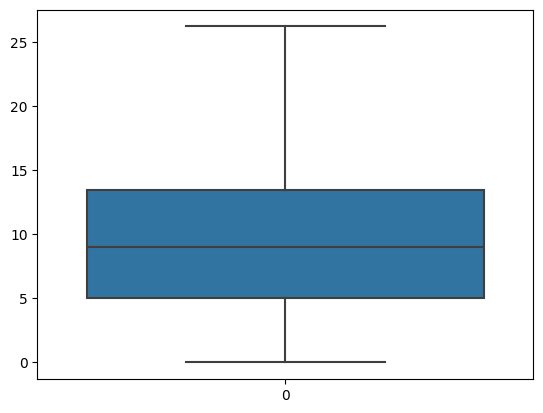

In [26]:
sns.boxplot(df['Wind Speed'])

In [27]:
df.head()

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Location,Weather Type
0,14.0,73,9.5,partly cloudy,1010.82,Winter,inland,Rainy
1,39.0,96,8.5,partly cloudy,1011.43,Spring,inland,Cloudy
2,30.0,64,7.0,clear,1018.72,Spring,mountain,Sunny
3,38.0,83,1.5,clear,1026.25,Spring,coastal,Sunny
4,27.0,74,17.0,overcast,990.67,Winter,mountain,Rainy


## Logistic Regression

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Weather Type' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Logistic Regression
step2 = LogisticRegression(max_iter=1000)  # Adding max_iter to ensure convergence

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Print classification metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7882575757575757
Precision: 0.7875416768756505
Recall: 0.7882575757575757
F1 Score: 0.7875097250130344


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Descion Tree

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'target' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Decision Tree Classifier
step2 = DecisionTreeClassifier(random_state=42)

# Create the pipeline
pipeline_dt = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = pipeline_dt.predict(X_test)

# Print accuracy
print('Decision Tree Classifier Accuracy:', accuracy_score(y_test, y_pred_dt))


Decision Tree Classifier Accuracy: 0.8212121212121212


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


 ## Random Forest

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'target' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Random Forest Classifier
step2 = RandomForestClassifier(random_state=42)

# Create the pipeline
pipeline_rf = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Print accuracy
print('Random Forest Classifier Accuracy:', accuracy_score(y_test, y_pred_rf))


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Classifier Accuracy: 0.8609848484848485


## KNN Classifier

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'target' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder for categorical features and StandardScaler for numeric features
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features),
    ('num', StandardScaler(), X.select_dtypes(include='number').columns.tolist())
], remainder='passthrough')

# Step 2: KNeighbors Classifier
step2 = KNeighborsClassifier()

# Create the pipeline
pipeline_knn = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = pipeline_knn.predict(X_test)

# Print accuracy
print('KNeighbors Classifier Accuracy:', accuracy_score(y_test, y_pred_knn))

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNeighbors Classifier Accuracy: 0.8208333333333333


## Support Vector Classifier

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'target' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder for categorical features and StandardScaler for numeric features
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features),
    ('num', StandardScaler(), X.select_dtypes(include='number').columns.tolist())
], remainder='passthrough')

# Step 2: Support Vector Classifier (SVC)
step2 = SVC()

# Create the pipeline
pipeline_svc = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = pipeline_svc.predict(X_test)

# Print accuracy
print('SVC Accuracy:', accuracy_score(y_test, y_pred_svc))


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVC Accuracy: 0.8473484848484848


## This is a Classification Problem We use Classification Algortihm And Pipe line
### In this Random Forest Show Good Acuracy As comapres to Others

In [33]:
import pickle

In [37]:
pickle.dump(df,open('dataframe.pkl','wb'))
pickle.dump(pipeline_rf,open('Model.pkl','wb'))